In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
sales_df = pd.read_csv("Sales_Data.csv")
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


In [19]:
sales_df.isnull().sum()

Date                   0
Product Name           0
Product Quantity       0
Units sold             0
Day                    0
Month                  0
Year                   0
DayOfWeek              0
Category               0
DayType                0
Rainfall            2103
Week_of_Year           0
dtype: int64

In [20]:
df = sales_df
df.dropna(inplace=True)

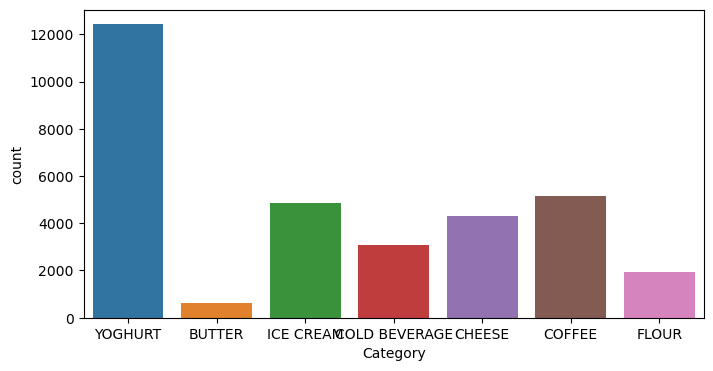

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x='Category', data=df)
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_13520\1516450634.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array


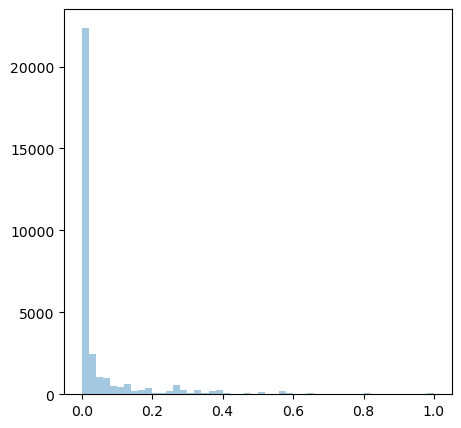

In [22]:
plt.figure(figsize=(5, 5))
sns.distplot(df['Rainfall'].values.flatten(), kde=False)  # Use flatten to convert any potential multi-dimensional array
plt.show()

# Random Forest Classifier Model- Accuracy 36.8%

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df = sales_df
label_encoder =  LabelEncoder()
df['DayOfWeek'] = label_encoder.fit_transform(df['DayOfWeek'])
df['DayType'] = label_encoder.fit_transform(df['DayType'])

# the input features (x) and the output variable (y) is defined
input = ['Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Rainfall', 'Week_of_Year']
target_variable = 'Category'

x = df[input]
y = df[target_variable]

In [25]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# the model is trained
classifier.fit(x_train, y_train)

# the model makes predictions
y_prediction = classifier.predict(x_test)

# the model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))


Accuracy: 0.3688511950655359
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.16      0.01      0.02      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.20      0.02      0.04       998
      YOGHURT       0.38      0.97      0.54      2431

     accuracy                           0.37      6485
    macro avg       0.10      0.14      0.09      6485
 weighted avg       0.20      0.37      0.21      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


An accuracy of 36.89% is obtained using 80- 20 split 

##### Tuning the hyperparameters of the model

In [26]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# the model is trained
classifier.fit(x_train, y_train)

# the model makes predictions
y_prediction = classifier.predict(x_test)

# the model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))



Accuracy: 0.3696926082039683
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       199
       CHEESE       0.00      0.00      0.00      1274
       COFFEE       0.14      0.01      0.02      1584
COLD BEVERAGE       0.05      0.00      0.00       946
        FLOUR       0.00      0.00      0.00       578
    ICE CREAM       0.17      0.03      0.05      1444
      YOGHURT       0.38      0.95      0.54      3702

     accuracy                           0.37      9727
    macro avg       0.11      0.14      0.09      9727
 weighted avg       0.20      0.37      0.22      9727



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy increases slightly to 36.97% when a 70- 30 split is used.

In [27]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# the model is trained
classifier.fit(x_train, y_train)

# the model makes predictions
y_prediction = classifier.predict(x_test)

# the model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))


Accuracy: 0.36977640709329224
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.15      0.01      0.02      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.20      0.02      0.03       998
      YOGHURT       0.37      0.98      0.54      2431

     accuracy                           0.37      6485
    macro avg       0.10      0.14      0.08      6485
 weighted avg       0.20      0.37      0.21      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


An accuracy of 36.98% is obtained when the number of decision trees is doubled. This is a very negligible improvement.

In [28]:
# Split the data into training and testing components
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# the model is trained
classifier.fit(x_train, y_train)

# the model makes predictions
y_prediction = classifier.predict(x_test)

# the model is evaluated using the accuracy score and the classification report
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy}")

# Display additional classification metrics
print(classification_report(y_test, y_prediction))


Accuracy: 0.36777178103315344
               precision    recall  f1-score   support

       BUTTER       0.00      0.00      0.00       132
       CHEESE       0.00      0.00      0.00       874
       COFFEE       0.13      0.01      0.02      1042
COLD BEVERAGE       0.00      0.00      0.00       626
        FLOUR       0.00      0.00      0.00       382
    ICE CREAM       0.18      0.02      0.03       998
      YOGHURT       0.37      0.97      0.54      2431

     accuracy                           0.37      6485
    macro avg       0.10      0.14      0.08      6485
 weighted avg       0.19      0.37      0.21      6485



c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


When the number of decision is halved, the accuracy score decreases by a negligible value. Thus it proves that tuning the hyperparameters prove to be futile. 

### Regression

The new dataset is analysed and is split into columns based on the categories. Then the Random Forest Regressor is used for prediction.

In [29]:
# list of numeric columns
numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall'] 
# list of categorical columns 
categorical_cols = ['Category', 'DayOfWeek', 'DayType']  

# Random Forest Regressor

### Testing the model with custom made data

Defined methods to fill the data

In [30]:
def weekOfYearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the week of the year
    week_of_year = date_obj.isocalendar()[1]

    return week_of_year

def dayOfWeekCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day of the week
    day_of_week = date_obj.isocalendar()[2]

    if day_of_week==7:
        day_of_week="Sunday"
    elif day_of_week==1:
        day_of_week="Monday"
    elif day_of_week==2:
        day_of_week="Tuesday"
    elif day_of_week==3:
        day_of_week="Wednesday"
    elif day_of_week==4:
        day_of_week="Thursday"
    elif day_of_week==5:
        day_of_week="Friday"
    elif day_of_week==6:
        day_of_week="Saturday"
    return day_of_week

def dayTypeCalculator(dayOfWeek):
    if dayOfWeek==6 or dayOfWeek==7:
        dayType="Weekend"
    else:
        dayType="Weekday"
    return dayType

def monthCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the month
    month = date_obj.month

    return month

def yearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the year
    year = date_obj.year

    return year

def dayCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day
    day = date_obj.day

    return day
def initialiseValuesToDataset(date,rainfall,dataset):
    weekOfYear=weekOfYearCalculator(date)
    dayOfWeek=dayOfWeekCalculator(date)
    dayType=dayTypeCalculator(dayOfWeek)
    day=dayCalculator(date)
    month=monthCalculator(date)
    year=yearCalculator(date)    
    dataset["Week_of_Year"].fillna(int(weekOfYear), inplace=True)
    dataset["Week_of_Year"] = dataset["Week_of_Year"].astype(int)

    dataset["DayOfWeek"].fillna(dayOfWeek, inplace=True)

    dataset["Day"].fillna(int(day), inplace=True)
    dataset["Day"] = dataset["Day"].astype(int)

    dataset["Month"].fillna(int(month), inplace=True)
    dataset["Month"] = dataset["Month"].astype(int)

    dataset["Year"].fillna(int(year), inplace=True)
    dataset["Year"] = dataset["Year"].astype(int)

    dataset["Rainfall"].fillna(rainfall, inplace=True)
    dataset["DayType"].fillna(dayType, inplace=True)
    return dataset

Entering the inputs from the user

In [ ]:
date="2024-01-19"
rainfall=1.3
predictions_df = pd.read_csv('Predictions.csv')
predictions_df=initialiseValuesToDataset(date,rainfall,predictions_df)

### Testing the model

In [ ]:
sales_df = sales_df[['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]

sales_df
input_cols = ['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()
sales_df = sales_df[['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall','Units sold']]

sales_df
input_cols = ['Product ID', 'Category', 'Day', 'Month', 'Year', 'DayOfWeek', 'DayType', 'Week_of_Year', 'Rainfall']
target_col = 'Units sold'
inputs = sales_df[input_cols].copy()
targets = sales_df[target_col].copy()

numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall']  # list of numeric columns
categorical_cols = ['Category', 'DayOfWeek', 'DayType']  # list of categorical columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

X = inputs[numeric_cols + encoded_cols]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf= 20, random_state=42)

model.fit(X, targets)
preds = model.predict(X)
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)
rmse(preds, targets)

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')

X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.3)

model = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf= 20, random_state=42)
model.fit(X_train, train_targets)
train_rmse = rmse(model.predict(X_train), train_targets)
val_rmse = rmse(model.predict(X_val), val_targets)
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
# Save the model
model.save_model('new_random_forest_classifier.json')

In [ ]:
model.predict(X_val)
X_val
sales_df.loc[28216]
results_df=pd.DataFrame({'Actual':val_targets, 'Predicted':model.predict(X_val)})

# Add 'Product ID' column to results_df from sales_df
results_df = results_df.join(sales_df['Product ID'])
results_df

In [ ]:
predictions_inputs = predictions_df[input_cols].copy()
predictions_inputs[numeric_cols] = scaler.transform(predictions_inputs[numeric_cols])

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(predictions_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

predictions_inputs[encoded_cols]=encoder.transform(predictions_inputs[categorical_cols])
predictions_transformed = predictions_inputs[numeric_cols + encoded_cols]

predictions_transformed

In [ ]:
model = RandomForestRegressor()
model.load_model('new_random_forest_classifier.json')
predictions = model.predict(predictions_transformed)
predictions_df['Units Sold']=predictions
predictions_df

In [ ]:
predictions=pd.read_csv('Predictions.csv')

### Considerable updates to be made to the system

* convert the dayOfWeek column to whether it is a holiday or not, to produce a binary value.
* consider dropping features if the model is overfitting
* the numeric and the categorical columns could be scaled.

In [ ]:
predictions = predictions.rename(columns={'DayType': 'IsAHoliday'})
predictions

Updating the defined methods

In [ ]:
def weekOfYearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the week of the year
    week_of_year = date_obj.isocalendar()[1]

    return week_of_year

def dayOfWeekCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day of the week
    day_of_week = date_obj.isocalendar()[2]

    return day_of_week

def IsAHoliday(dayOfWeek):
    if dayOfWeek==6 or dayOfWeek==7:
        dayType=1
    else:
        dayType=0
    return dayType

def monthCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the month
    month = date_obj.month

    return month

def yearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the year
    year = date_obj.year

    return year

def dayCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day
    day = date_obj.day

    return day
def initialiseValuesToDataset(date,rainfall,dataset):
    weekOfYear=weekOfYearCalculator(date)
    dayOfWeek=dayOfWeekCalculator(date)
    isHoliday=IsAHoliday(dayOfWeek)
    day=dayCalculator(date)
    month=monthCalculator(date)
    year=yearCalculator(date)    
    dataset["Week_of_Year"].fillna(int(weekOfYear), inplace=True)
    dataset["Week_of_Year"] = dataset["Week_of_Year"].astype(int)

    dataset["DayOfWeek"].fillna(int(dayOfWeek), inplace=True)
    dataset["DayOfWeek"] = dataset["DayOfWeek"].astype(int)

    dataset["IsAHoliday"].fillna(isHoliday, inplace=True)
    dataset["IsAHoliday"] = dataset["IsAHoliday"].astype(int)

    dataset["Day"].fillna(int(day), inplace=True)
    dataset["Day"] = dataset["Day"].astype(int)

    dataset["Month"].fillna(int(month), inplace=True)
    dataset["Month"] = dataset["Month"].astype(int)

    dataset["Year"].fillna(int(year), inplace=True)
    dataset["Year"] = dataset["Year"].astype(int)

    dataset["Rainfall"].fillna(rainfall, inplace=True)
    return dataset

In [ ]:
date="2024-01-20"
rainfall=1.3
predictions_df = pd.read_csv('Predictions.csv')
predictions_df=initialiseValuesToDataset(date,rainfall,predictions_df)

In [31]:
sales_df=pd.read_csv('Sales_Data_New.csv')

In [ ]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Create a new column "DayOfWeek" with values ranging from 1 to 7 (Monday to Sunday)
sales_df['DayOfWeek'] = sales_df['Date'].dt.dayofweek + 1

# Displaying the updated DataFrame
sales_df

In [ ]:
# Rename the 'DayType' column to 'IsAHoliday'
sales_df = sales_df.rename(columns={'DayType': 'IsAHoliday'})

# Update values in the 'IsAHoliday' column based on the day of the week
sales_df['IsAHoliday'] = (sales_df['DayOfWeek'] >= 6).astype(int)

# Displaying the final updated DataFrame
sales_df = sales_df.rename(columns={'Units sold': 'Units Sold'})
sales_df=sales_df[['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year',
       'Rainfall', 'Category', 'DayOfWeek', 'IsAHoliday', 'Units Sold']]

In [ ]:
sales_df.to_csv('Sales_Data_New.csv', index=False)

The changes have been made to the model

### Training the new model

#### Feature Preprocessing

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib

sales_df=pd.read_csv('Sales_Data_New.csv')
# Assuming your DataFrame is named 'salesdf'
# Assuming 'Units Sold' is the target variable

# Extracting features and target variable
features = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'DayOfWeek', 'IsAHoliday', 'Category']
target = 'Units Sold'


numeric_cols = ['Product ID', 'Day', 'Month', 'Year', 'Week_of_Year', 'Rainfall', 'DayOfWeek', 'IsAHoliday']
categorical_cols=['Category']
scaler = StandardScaler()
sales_df[numeric_cols] = scaler.fit_transform(sales_df[numeric_cols])
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(sales_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
sales_df[encoded_cols] = encoder.transform(sales_df[categorical_cols])

X = sales_df[numeric_cols + encoded_cols]
y = sales_df[target]

c:\Users\arkha\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

classifier = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf= 20, random_state=42)
classifier.fit(X_train, y_train)

y_calc = classifier.predict(X_val)

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

train_rmse = rmse(classifier.predict(X_train), y_train)
val_rmse = rmse(classifier.predict(X_val), y_val)
r2_cal = r2_score(y_val, y_calc)
print(f"r2 score for the model is {r2_cal}.")
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

r2 score for the model is 0.12862776589901137.
Train RMSE: 39.36558965742312, Validation RMSE: 29.857593858814976


The model, encoder and the scaler are saved

In [ ]:
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(encoder, 'encoder.joblib')
model.save_model('rf_regressor_model.model')

### Testing the model on New Input

Populate to predict the quntities sold.

In [ ]:
def weekOfYearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the week of the year
    week_of_year = date_obj.isocalendar()[1]

    return week_of_year

def dayOfWeekCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day of the week
    day_of_week = date_obj.isocalendar()[2]

    return day_of_week

def IsAHoliday(dayOfWeek):
    if dayOfWeek==6 or dayOfWeek==7:
        dayType=1
    else:
        dayType=0
    return dayType

def monthCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the month
    month = date_obj.month

    return month

def yearCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the year
    year = date_obj.year

    return year

def dayCalculator(date):
    from datetime import datetime
    date_obj = datetime.strptime(date, "%Y-%m-%d")

    # Get the day
    day = date_obj.day

    return day
def initialiseValuesToDataset(date,rainfall,dataset):
    weekOfYear=weekOfYearCalculator(date)
    dayOfWeek=dayOfWeekCalculator(date)
    isHoliday=IsAHoliday(dayOfWeek)
    day=dayCalculator(date)
    month=monthCalculator(date)
    year=yearCalculator(date)    
    dataset["Week_of_Year"].fillna(int(weekOfYear), inplace=True)
    dataset["Week_of_Year"] = dataset["Week_of_Year"].astype(int)

    dataset["DayOfWeek"].fillna(int(dayOfWeek), inplace=True)
    dataset["DayOfWeek"] = dataset["DayOfWeek"].astype(int)

    dataset["IsAHoliday"].fillna(isHoliday, inplace=True)
    dataset["IsAHoliday"] = dataset["IsAHoliday"].astype(int)

    dataset["Day"].fillna(int(day), inplace=True)
    dataset["Day"] = dataset["Day"].astype(int)

    dataset["Month"].fillna(int(month), inplace=True)
    dataset["Month"] = dataset["Month"].astype(int)

    dataset["Year"].fillna(int(year), inplace=True)
    dataset["Year"] = dataset["Year"].astype(int)

    dataset["Rainfall"].fillna(rainfall, inplace=True)
    return dataset

In [ ]:
date="2024-01-20"
rainfall=10.0
new_record = pd.read_csv('Predictions.csv')
new_record=initialiseValuesToDataset(date,rainfall,new_record)
results=new_record

scaler = joblib.load('scaler.joblib')# Loading the scaler
encoder = joblib.load('encoder.joblib')# Loading the encoder
model = RandomForestRegressor
model.load_model('rf_regressor_model.model')# Loading the model

columns_to_drop = ["Product Name", "Units Sold"]#not needed for prediction
new_record = new_record.drop(columns=columns_to_drop)  

# Separate numeric and categorical columns
numeric_cols_new_record = new_record.select_dtypes(include=['number'])#get the numeric columns and store in a variable
categorical_cols_new_record = new_record.select_dtypes(exclude=['number'])#get the categorical columns and store in a variable

# Preprocess the numeric columns
numeric_cols_new_record_scaled = scaler.transform(numeric_cols_new_record)

# Preprocess the categorical columns
categorical_cols_new_record_encoded = pd.DataFrame(encoder.transform(categorical_cols_new_record), columns=encoded_cols)#get ehe encoded version

# Combine the preprocessed numeric and categorical columns
new_record[numeric_cols_new_record.columns] = numeric_cols_new_record_scaled#set the scaled values and the encoded values to the new_record dataframe
new_record=pd.concat([new_record, categorical_cols_new_record_encoded], axis=1)
new_record.drop(columns="Category", inplace=True)

# Make predictions
predicted_units_sold = model.predict(new_record)#predicts the units sold

results["Units Sold"] = predicted_units_sold.astype(int)#converts the predicted units sold to int and stores in the results datafram

#### Viewing the predictions made by the model

In [ ]:
# displaying the results 
results[["Product Name","Category","Units Sold"]]